### Loading Data

In [23]:
#file = open('Royal_data.txt', 'r')
##file = open('Sheakspere.txt', 'r')
#royal_data = file.readlines()
#print(royal_data)
#file.close()

### Removing '\n' from the end of every sentence and convert the sentence into lowercase   


In [24]:
royal_data = """The future king is the prince
Daughter is the princess
Son is the prince
Only a man can be a king
Only a woman can be a queen
The princess will be a queen
The prince is a strong man
The princess is a beautiful woman
Prince is only a boy now
Prince will be king
A boy will be a man
"""

royal_data = royal_data.splitlines()

In [25]:
for i in range(len(royal_data)):
    royal_data[i] = royal_data[i].lower().replace('\n', '')

print(royal_data)


['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


### Removing stop words


In [26]:
stopwords = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

filtered_data = []
for sent in royal_data:
    temp = []
    for word in sent.split():
        if word not in stopwords:
            temp.append(word)
    filtered_data.append(temp)

print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


### Creating bigrams


In [27]:
bigrams = []
for words_list in filtered_data:
    for i in range(len(words_list) - 1):
        for j in range(i+1, len(words_list)):
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])


print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


### Getting a list of unique words

In [28]:
all_words = []
for bi in bigrams:
    all_words.extend(bi)

all_words = list(set(all_words))
all_words.sort()

print(all_words)
print("Total number of unique words are:", len(all_words))

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']
Total number of unique words are: 12


### Creating dictionary of words

In [29]:
words_dict = {}

counter = 0
for word in all_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


### Performing one-hot encoding

In [30]:
import numpy as np

onehot_data = np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
    onehot_data[i][i] = 1

onehot_dict = {}
counter = 0
for word in all_words:
    onehot_dict[word] = onehot_data[counter]
    counter += 1

for word in onehot_dict:
    print(word, ":", onehot_dict[word])


beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [39]:
X = []
Y = []

for bi in bigrams:
    print(bi)
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])
    print(onehot_dict[bi[0]], onehot_dict[bi[1]])

X = np.array(X)
Y = np.array(Y)

['future', 'king']
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
['king', 'future']
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
['future', 'prince']
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
['prince', 'future']
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
['king', 'prince']
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
['prince', 'king']
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
['daughter', 'princess']
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
['princess', 'daughter']
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
['son', 'prince']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
['prince', 'son']
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
['man', 'king']
[0. 0. 0. 0. 0. 1. 0

### Model

In [40]:
from keras.models import Sequential
from keras.layers import Dense

embed_size = 2

model = Sequential([
    Dense(embed_size, activation='linear'),
    Dense(Y.shape[1], activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')



In [35]:
model.fit(X, Y, epochs = 100, batch_size = 256, verbose = False)

In [36]:
weights = model.get_weights()[0]

word_embeddings = {}
for word in all_words:
    word_embeddings[word] = weights[words_dict[word]]
    print(word, word_embeddings[word])

beautiful [-0.6155759  0.146199 ]
boy [-0.4647809 -0.7465764]
daughter [-0.9371079   0.71488464]
future [0.26360327 0.5856925 ]
king [-0.64604414 -0.87976825]
man [0.15328915 1.3741745 ]
prince [0.94283473 0.7415966 ]
princess [ 1.4577309 -1.7552816]
queen [-0.35254267 -0.09679596]
son [-0.74653226 -0.6641715 ]
strong [-0.7471929 -0.9976521]
woman [ 0.56228364 -1.2645688 ]


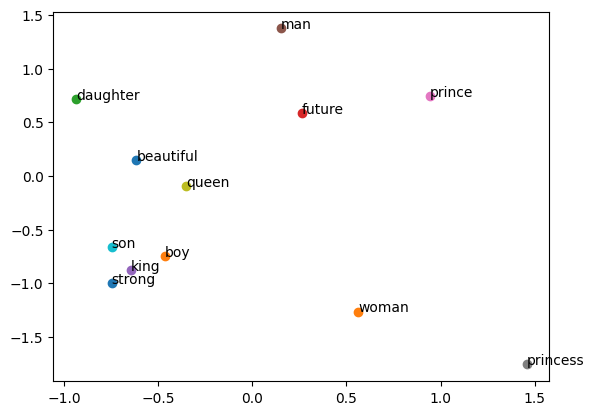

In [37]:
import matplotlib.pyplot as plt

# plt.figure(figsize = (10, 10))
for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.savefig('img.jpg')

In [38]:
import numpy
x=model.predict(onehot_dict['beautiful'].reshape(1,-1))
print(x)
print(numpy.max(x))
all_words[numpy.argmax(x)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
[[0.00813231 0.02294867 0.00362322 0.0632719  0.02482188 0.15440463
  0.3630002  0.24417321 0.00702631 0.01121227 0.01553406 0.08185131]]
0.3630002


'prince'